In [34]:
## Loading Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


#import kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [35]:
data=pd.read_csv('/content/spotify (1).csv')

In [36]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [37]:
data.shape

(114000, 21)

In [38]:
## Checking for missing values and duplicates
data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [39]:
data.dropna(inplace=True)

In [40]:
data=data.drop('Unnamed: 0',axis=1)

In [41]:
data.duplicated().sum()

np.int64(450)

In [42]:
data.drop_duplicates(inplace=True)

In [43]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           113549 

In [45]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [46]:
df=data.drop((data.select_dtypes(include='object').columns),axis=1)
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['explicit']=le.fit_transform(df['explicit'])

In [67]:
df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [49]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.085584,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218
std,22.283855,1.064131e+05,0.279750,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.000000,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,35.000000,2.130000e+05,0.000000,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615880e+05,0.000000,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## Explaratory Data Analysis

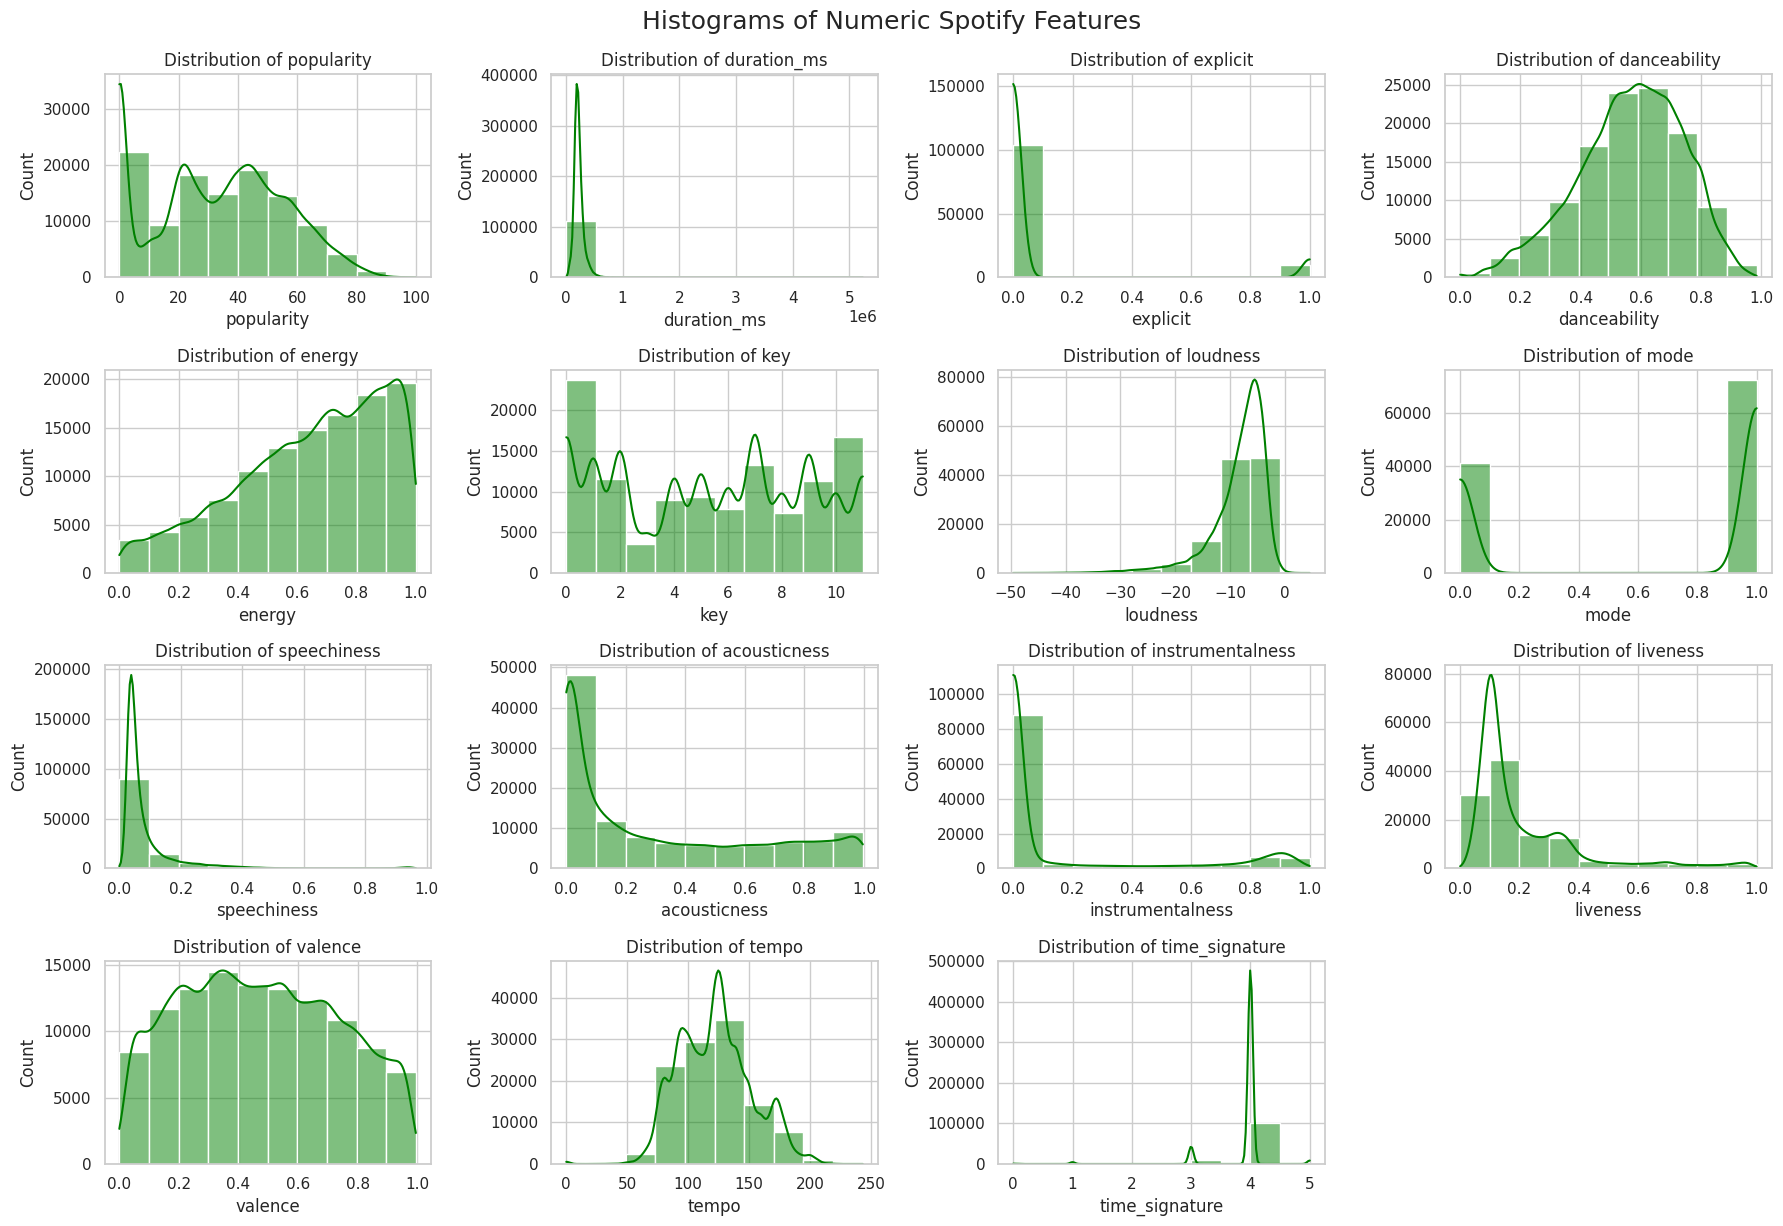

In [50]:
# Select only numeric columns
numeric_cols = df.columns.tolist()

plt.figure(figsize=(18,12))
sns.set(style='whitegrid')

for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)  # 4 rows × 4 columns
    sns.histplot(df[col], kde=True, bins=10, color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.suptitle('Histograms of Numeric Spotify Features', fontsize=18, y=1.02)
plt.show()

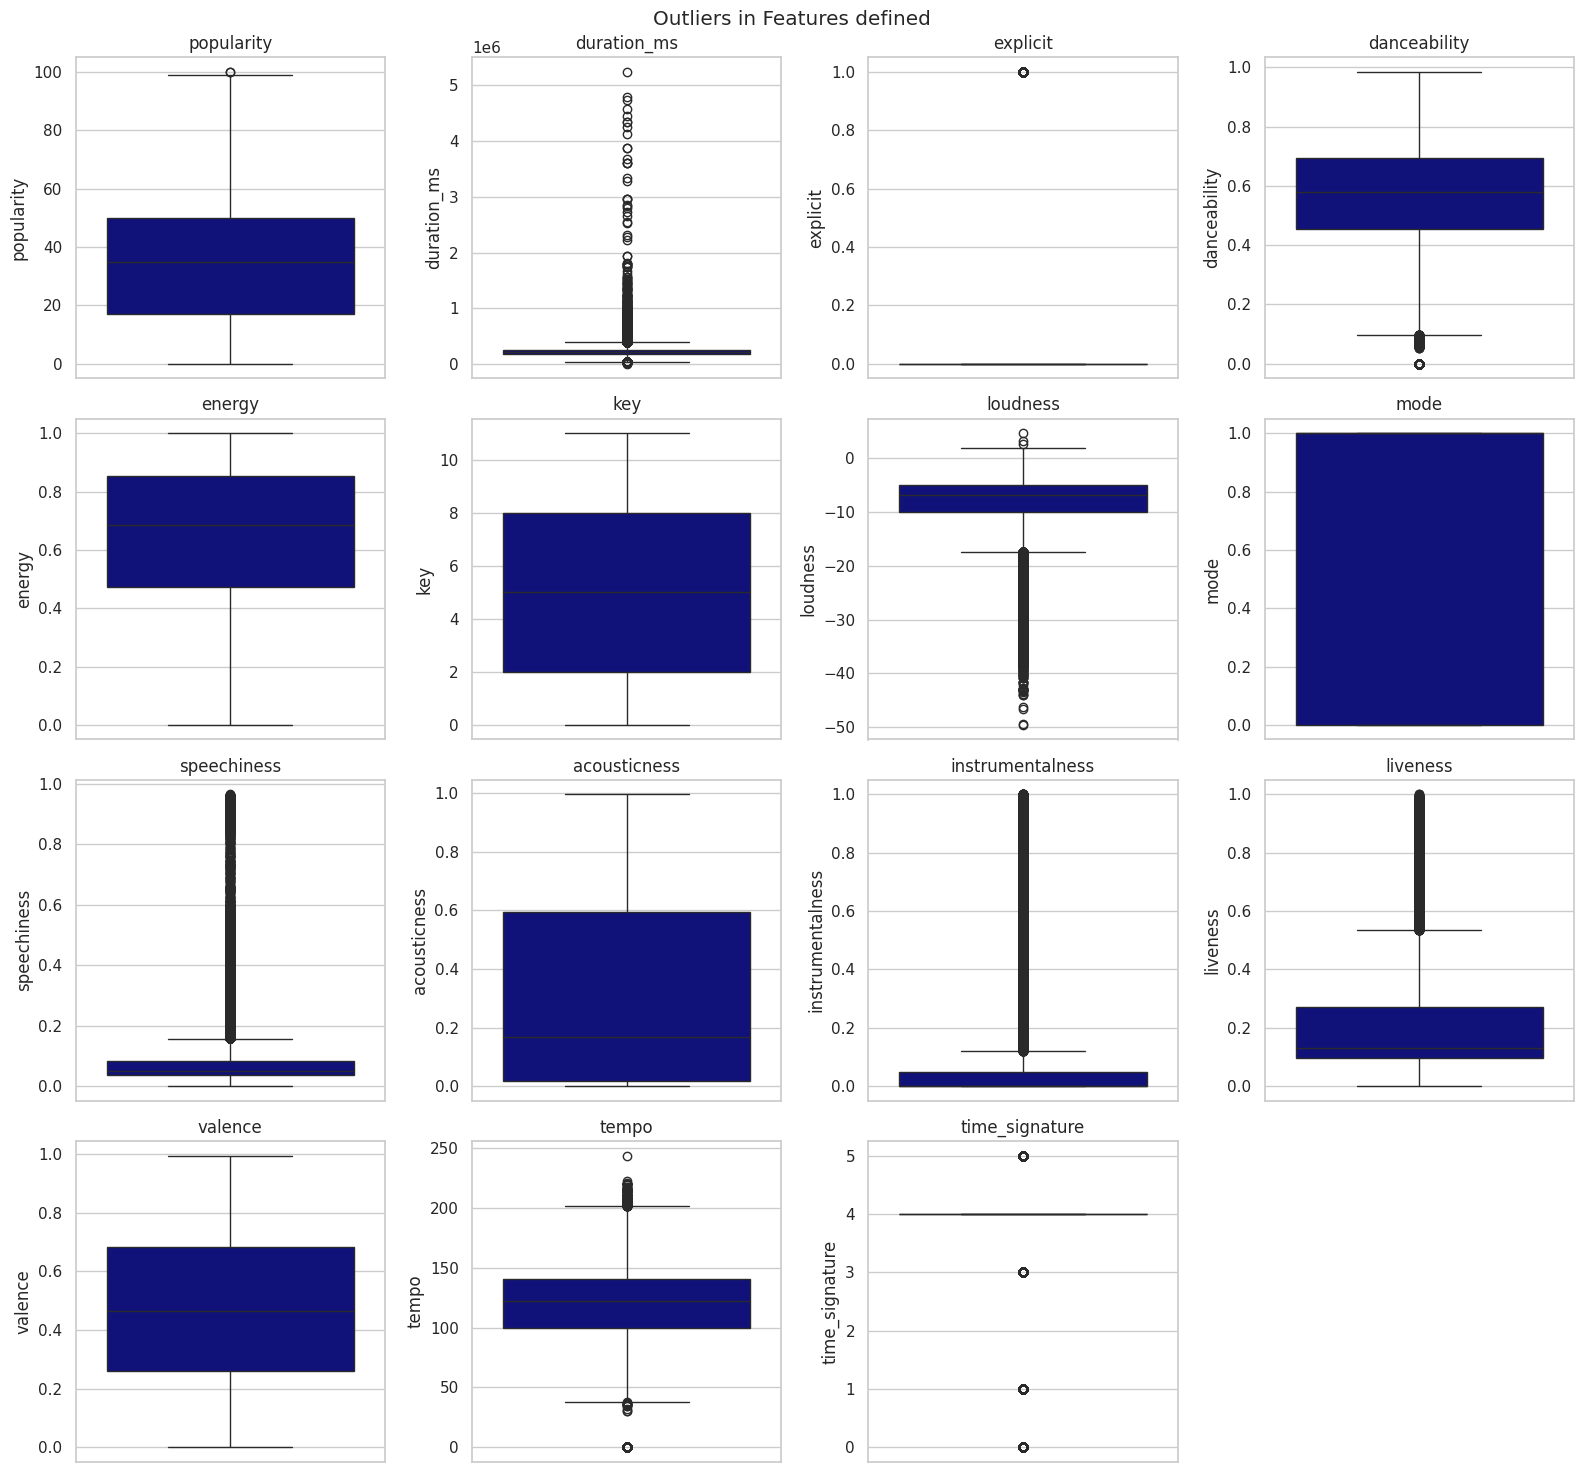

In [51]:
plt.figure(figsize=(16,15))
plt.suptitle("Outliers in Features defined")
for i ,col in enumerate(df.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(data=df, y=col,color='darkblue')
    plt.title(col)

plt.tight_layout()
plt.show()

In [68]:
features_outliers_removal=['duration_ms','loudness','speechiness','tempo','time_signature']
df1=df.copy()

for Feature in features_outliers_removal:
    Q1=df[Feature].quantile(0.25)
    Q3=df[Feature].quantile(0.75)
    IQR=Q3-Q1

    Lowerbound=Q1-1.5*IQR
    Upperbound=Q3+1.5*IQR

    df1= df1[(df1[Feature]>=Lowerbound) & (df1[Feature]<=Upperbound)]

df1.head()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0,0.438,0.359,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
4,82,198853,0,0.618,0.443,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4
5,58,214240,0,0.688,0.481,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4


In [69]:
df1.shape

(82034, 15)

In [70]:
data.shape

(113549, 20)

In [71]:
#scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df1)

# Dimensionality Reduction (PCA)

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_scaled_pca = pca.fit_transform(df_scaled)

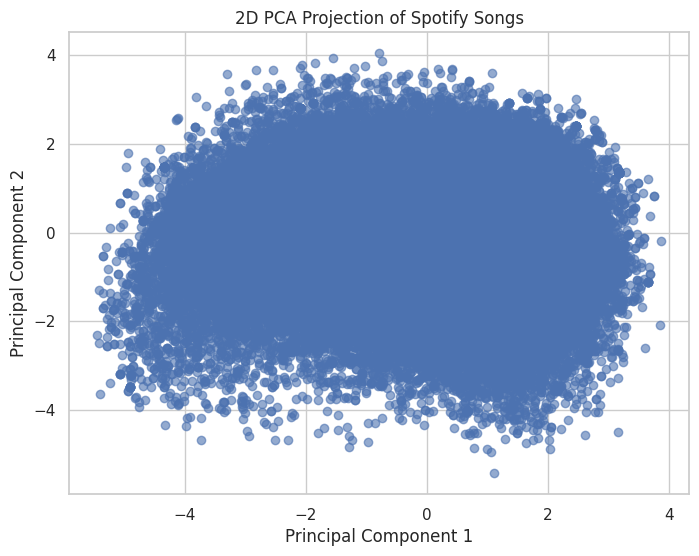

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(x=df_scaled_pca[:, 0], y=df_scaled_pca[:, 1], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of Spotify Songs")
plt.show()


In [76]:
from sklearn.decomposition import PCA

pca1 = PCA()
df_scaled_pca1 = pca1.fit_transform(df_scaled)

explained_variance = np.cumsum(pca1.explained_variance_ratio_)
explained_variance


array([0.18748759, 0.30357608, 0.39238846, 0.47409233, 0.55270116,
       0.62752714, 0.69479514, 0.75839092, 0.81644575, 0.87370895,
       0.92486422, 0.95932192, 0.98885922, 1.        , 1.        ])

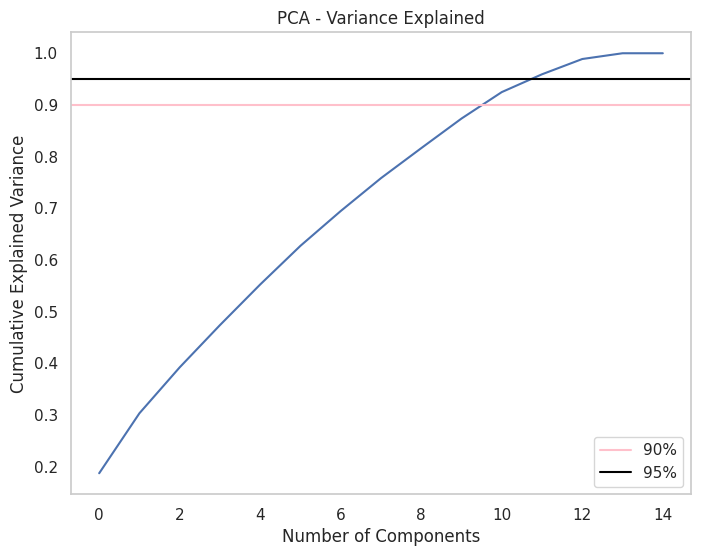

In [75]:
plt.figure(figsize=(8,6))
plt.plot(explained_variance,  linestyle='-')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.axhline(y=0.90, color='pink', linestyle='-', label="90%")
plt.axhline(y=0.95, color='black', linestyle='-', label="95%")
plt.legend()
plt.grid()
plt.show()

-Used PCA to reduce dimensionality while keeping most of the data's information. The first 10 components explain about 90% of the variance, and the first 12 explain around 95%. So, we can keep 10–12 components without losing much information.

# 3. K-Means Clustering

In [60]:
inertia=[]
silhouette_scores=[]
K_Value=range(2,11)
for k in K_Value:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df_scaled_pca)
  Labels=kmeans.labels_
  inertia_s=kmeans.inertia_
  inertia.append(inertia_s)
  sil_scores=silhouette_score(df_scaled_pca,Labels)

  silhouette_scores.append(sil_scores)
  print(f'k={k}: inertia={inertia_s:.2f}, Silhouette Score={sil_scores:.2f}')

k=2: inertia=999165.40, Silhouette Score=0.13
k=3: inertia=930324.19, Silhouette Score=0.10
k=4: inertia=888304.47, Silhouette Score=0.10
k=5: inertia=842706.76, Silhouette Score=0.09
k=6: inertia=766946.10, Silhouette Score=0.12
k=7: inertia=736907.85, Silhouette Score=0.11
k=8: inertia=716498.50, Silhouette Score=0.10
k=9: inertia=698016.96, Silhouette Score=0.10
k=10: inertia=674162.57, Silhouette Score=0.10


<Figure size 1200x500 with 0 Axes>

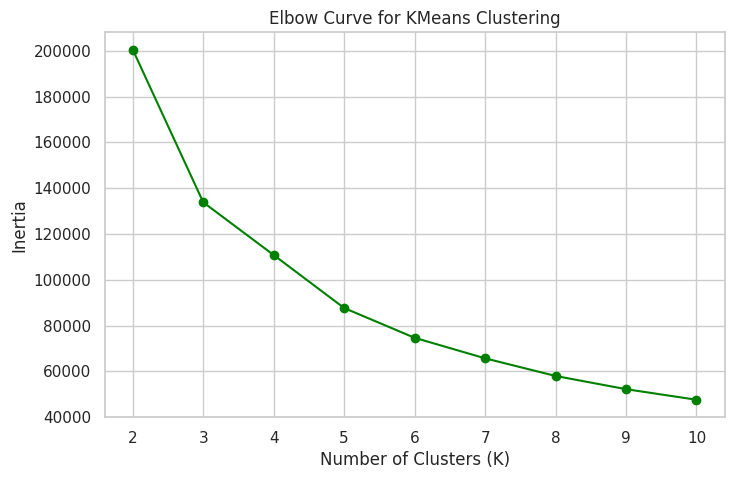

In [61]:

# Elbow Curve (Inertia)
plt.figure(figsize=(12, 5))

K_Value = range(2, 11)
inertia = [200451.36, 133829.31, 110814.00, 87671.21, 74675.18, 65710.67, 58017.63, 52250.98,47626.82]

plt.figure(figsize=(8, 5))
plt.plot(K_Value, inertia, marker='o', linestyle='-', color='green')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_Value)
plt.grid(True)
plt.show()

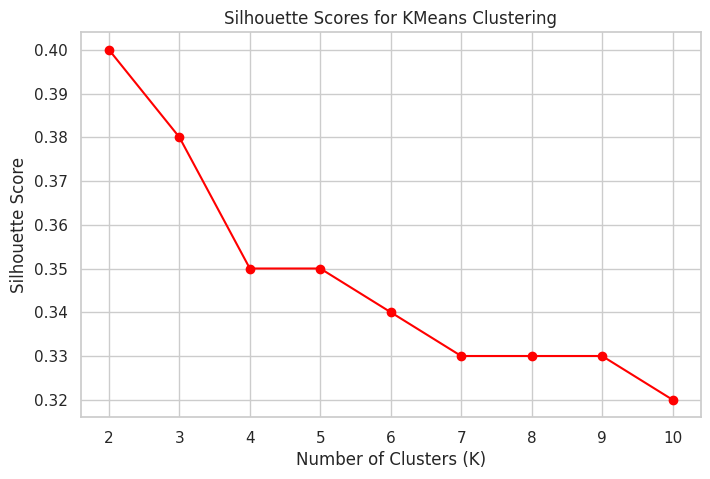

In [62]:
#plot silhouette curve
silhouette_scores = [0.40, 0.38, 0.35, 0.35, 0.34, 0.33, 0.33, 0.33, 0.32]

plt.figure(figsize=(8, 5))
plt.plot(K_Value, silhouette_scores, marker='o',color='red')
plt.title('Silhouette Scores for KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K_Value)
plt.grid(True)
plt.show()

In [63]:
#apply  Clustering K means

# Fit KMeans on scaled data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)


In [33]:
#Evaluate results using:  Silhouette Score & Davies-Bouldin Index

from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score = silhouette_score(df_scaled_pca, kmeans_labels)
db_score = davies_bouldin_score(df_scaled_pca, kmeans_labels)

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Davies-Bouldin Index: {db_score:.3f}")


Silhouette Score: 0.127
Davies-Bouldin Index: 2.291


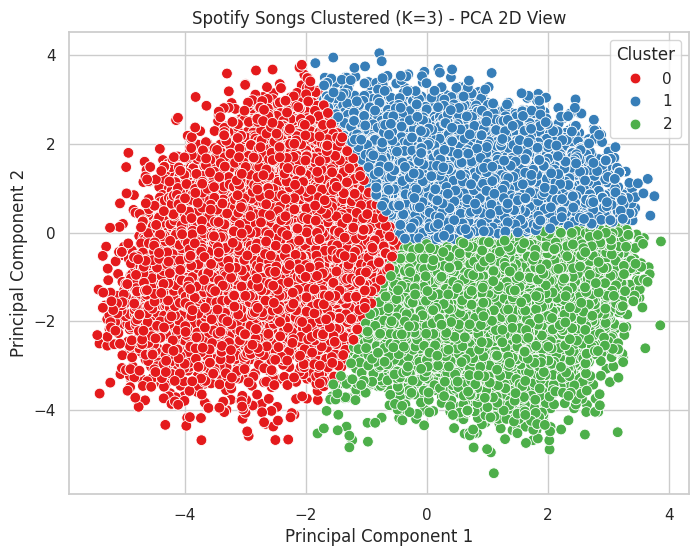

In [79]:
#Visualize clusters in 2D using PCA.

kmodel=KMeans(n_clusters=3,random_state=42)
kmodel.fit(df_scaled_pca)
label=kmodel.labels_

# Create DataFrame with cluster labels
df_plot = pd.DataFrame(df_scaled_pca, columns=['PC1', 'PC2'])
df_plot['Cluster'] = label

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=60)
plt.title("Spotify Songs Clustered (K=3) - PCA 2D View")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

The 2D PCA plot shows that the 3 clusters formed by K-Means are relatively well-separated with minimal overlap. This separation suggests K-Means effectively grouped the songs based on their audio features, which can be used for music recommendation or playlist generation.


# 4. Hierarchical Clustering

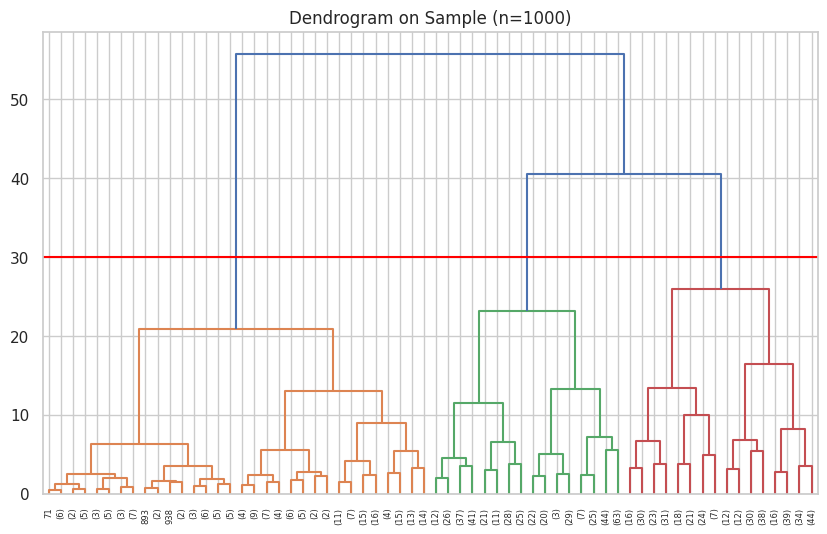

In [80]:
# Sample 1000 rows randomly from your data
df_sample = df_scaled_pca[np.random.choice(df_scaled_pca.shape[0], 1000, replace=False)]

import scipy.cluster.hierarchy as sch

# Then run linkage and dendrogram on the sample
linked = sch.linkage(df_sample, method='ward')

plt.figure(figsize=(10, 6))
sch.dendrogram(linked, truncate_mode='level', p=5)
plt.axhline(y=30, color='red', linestyle='-')

plt.title("Dendrogram on Sample (n=1000)")
plt.show()

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_agg = kmeans.fit_predict(df_sample)


In [82]:
#Evaluate with Silhouette Score & Davies-Bouldin Index

from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score_agg = silhouette_score(df_sample, kmeans_agg)
db_score_agg = davies_bouldin_score(df_sample, kmeans_agg)

print(f"Silhouette Score: {sil_score_agg:.3f}")
print(f"Davies-Bouldin score: {db_score_agg:.3f}")


Silhouette Score: 0.375
Davies-Bouldin score: 0.919


In [ ]:
#compare results:


# compare results:-

*Silhouette Score* tells us how well the data points fit into their assigned clusters.

KMeans had a score of 0.127, which is quite low.

Hierarchical Clustering had a higher score of 0.375, meaning the clusters were more distinct and well-separated.

*Davies-Bouldin Index* measures the average similarity between clusters — lower is better.

KMeans scored 2.291, which suggests that the clusters were not very distinct.

Hierarchical Clustering scored much better at 0.919, indicating clearer separation between clusters.

overall,Hierarchical Clustering performed better than KMeans



# **5. Model Validation**

In [83]:
seeds = [10, 42, 50, 77 ]

# Store scores for comparison  results:
results = []
#import kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

for seed in seeds:
    kmeans = KMeans(n_clusters=3, random_state=seed, n_init=10)
    labels = kmeans.fit_predict(df_scaled_pca)  # use scaled data, not PCA

    sil = silhouette_score(df_scaled_pca, labels)
    db = davies_bouldin_score(df_scaled_pca, labels)

    results.append((seed, sil, db))
    print(f"Seed={seed} → Sil_Score = {sil:.3f}, Davies-Bouldin= {db:.3f}")

Seed=10 → Sil_Score = 0.377, Davies-Bouldin= 0.899
Seed=42 → Sil_Score = 0.377, Davies-Bouldin= 0.900
Seed=50 → Sil_Score = 0.377, Davies-Bouldin= 0.900
Seed=77 → Sil_Score = 0.377, Davies-Bouldin= 0.900


In [84]:
# Assuming you used KMeans and got labels
df1['Cluster'] = kmeans.labels_  # or whatever clustering you used

# View average features for each cluster
cluster_mean = df1.groupby('Cluster').mean()
print(cluster_mean)


         popularity    duration_ms  explicit  danceability    energy  \
Cluster                                                                
0         33.366584  201688.078775  0.106184      0.679699  0.749269   
1         34.964137  247292.660735  0.062809      0.484705  0.823837   
2         35.203598  214797.731858  0.016974      0.554331  0.407003   

              key   loudness      mode  speechiness  acousticness  \
Cluster                                                             
0        5.415531  -5.974519  0.633888     0.060560      0.194591   
1        5.411816  -5.784058  0.582332     0.063321      0.067861   
2        5.038577 -10.645458  0.732696     0.042275      0.607781   

         instrumentalness  liveness   valence       tempo  time_signature  
Cluster                                                                    
0                0.028178  0.203425  0.681520  120.531005             4.0  
1                0.202423  0.250662  0.353527  134.661776        

In [85]:
cluster_labels = {
    0: "Chill Acoustic",
    1: "High Energy Dance",
    2: "Pop Hit"
}

# Add a new column
df1['Cluster_Label'] = df1['Cluster'].map(cluster_labels)
df1

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Cluster,Cluster_Label
0,73,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,0,Chill Acoustic
1,55,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,2,Pop Hit
2,57,210826,0,0.438,0.359,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,2,Pop Hit
4,82,198853,0,0.618,0.443,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,2,Pop Hit
5,58,214240,0,0.688,0.481,6,-8.807,1,0.1050,0.28900,0.000000,0.1890,0.666,98.017,4,0,Chill Acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113991,32,250629,0,0.387,0.531,8,-4.788,1,0.0290,0.00305,0.000000,0.2010,0.153,146.003,4,1,High Energy Dance
113992,38,312566,0,0.475,0.860,10,-4.722,1,0.0421,0.00650,0.000002,0.2460,0.427,113.949,4,1,High Energy Dance
113997,22,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.86700,0.000000,0.0839,0.743,132.378,4,2,Pop Hit
113998,41,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.38100,0.000000,0.2700,0.413,135.960,4,2,Pop Hit


In [86]:
#Re-attach original non-numeric info (track name + artist)
df1[['track_name', 'artists']] = data[['track_name', 'artists']]
df1

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Cluster,Cluster_Label,track_name,artists
0,73,230666,0,0.676,0.461,1,-6.746,0,0.1430,0.03220,0.000001,0.3580,0.715,87.917,4,0,Chill Acoustic,Comedy,Gen Hoshino
1,55,149610,0,0.420,0.166,1,-17.235,1,0.0763,0.92400,0.000006,0.1010,0.267,77.489,4,2,Pop Hit,Ghost - Acoustic,Ben Woodward
2,57,210826,0,0.438,0.359,0,-9.734,1,0.0557,0.21000,0.000000,0.1170,0.120,76.332,4,2,Pop Hit,To Begin Again,Ingrid Michaelson;ZAYN
4,82,198853,0,0.618,0.443,2,-9.681,1,0.0526,0.46900,0.000000,0.0829,0.167,119.949,4,2,Pop Hit,Hold On,Chord Overstreet
5,58,214240,0,0.688,0.481,6,-8.807,1,0.1050,0.28900,0.000000,0.1890,0.666,98.017,4,0,Chill Acoustic,Days I Will Remember,Tyrone Wells
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113991,32,250629,0,0.387,0.531,8,-4.788,1,0.0290,0.00305,0.000000,0.2010,0.153,146.003,4,1,High Energy Dance,At The Cross (Love Ran Red),Chris Tomlin
113992,38,312566,0,0.475,0.860,10,-4.722,1,0.0421,0.00650,0.000002,0.2460,0.427,113.949,4,1,High Energy Dance,Your Love Never Fails,Jesus Culture
113997,22,271466,0,0.629,0.329,0,-10.895,0,0.0420,0.86700,0.000000,0.0839,0.743,132.378,4,2,Pop Hit,Miss Perfumado,Cesária Evora
113998,41,283893,0,0.587,0.506,7,-10.889,1,0.0297,0.38100,0.000000,0.2700,0.413,135.960,4,2,Pop Hit,Friends,Michael W. Smith


In [87]:
def predict_cluster(song_features, scaler, pca, model, label_map):
    # Scale the input
    scaled = scaler.transform([song_features])

    # Reduce to 2D using PCA
    reduced = pca.transform(scaled)

    # Predict cluster
    cluster = model.predict(reduced)[0]

    # Get label name
    label = label_map.get(cluster, f"Unknown Cluster {cluster}")
    return cluster, label


In [88]:
new_song = [73, 230666, 0, 0.676, 0.461, 1, -6.76, 0, 0.1430, 0.03220, 0.000001, 0.3580, 0.715, 87.917, 4]

cluster, label = predict_cluster(new_song, scaler, pca, kmeans, cluster_labels)

print(f"The song belongs to Cluster {cluster} ({label})")


The song belongs to Cluster 0 (Chill Acoustic)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [93]:
song_recommendations = df1.groupby('Cluster').apply(
    lambda x: x[['Cluster', 'track_name', 'artists']].sample(3, random_state=42)
).reset_index(drop=True)

song_recommendations

/tmp/ipython-input-93-4155366418.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  song_recommendations = df1.groupby('Cluster').apply(


,Cluster,track_name,artists
0,0,Sound the Alarm,The Knocks;Rivers Cuomo;Royal & the Serpent
1,0,Señales Erróneas,Los Pericos
2,0,Looby Loo,Patty Shukla
3,1,Impermanence,Architects;Winston McCall
4,1,Memento - Radio Edit,NG Rezonance
5,1,To Myself,NK;Uplink
6,2,Saving Us a Riot,Phoria
7,2,Hannah & Gabi - DemoVersion,The Lemonheads
8,2,The Good Ones,Gabby Barrett


In [94]:
#save the model
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca1, 'pca1.pkl')
joblib.dump(le,'encoder.pk1')

['encoder.pk1']